# K Nearest Neighbors with Python

You've been given a classified data set from a company! 
They've hidden the feature column names but have given you the data and the target classes. 
We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [6]:
df = pd.read_csv("classified_data.csv",index_col= 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000 entries, 0.9139173265804122 to 0.837459538491111
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PTI           1000 non-null   float64
 1   EQW           1000 non-null   float64
 2   SBI           1000 non-null   float64
 3   LQE           1000 non-null   float64
 4   QWG           1000 non-null   float64
 5   FDJ           1000 non-null   float64
 6   PJF           1000 non-null   float64
 7   HQE           1000 non-null   float64
 8   NXJ           1000 non-null   float64
 9   TARGET CLASS  1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.9 KB


In [8]:
df.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,,,,,,,,,,
0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [13]:
scaled_features

array([[ 0.18590747, -0.91343069,  0.31962911, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-0.43034845, -1.02531333,  0.62538826, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [ 0.33931821,  0.30151137,  0.75587279, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [-0.51308341, -0.17920486,  1.02225452, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [-0.98278576, -1.46519359, -0.07146471, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.59589427, -1.4313981 ,  0.51272174, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
KNeighborsClassifier()

KNeighborsClassifier()

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred = knn.predict(X_test)


In [22]:
pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

## Predictions and Evaluations

Let's evaluate our KNN model!

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[131  13]
 [ 21 135]]


In [26]:
(141+133)/(141+133+9+17)

0.9133333333333333

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       144
           1       0.91      0.87      0.89       156

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [28]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

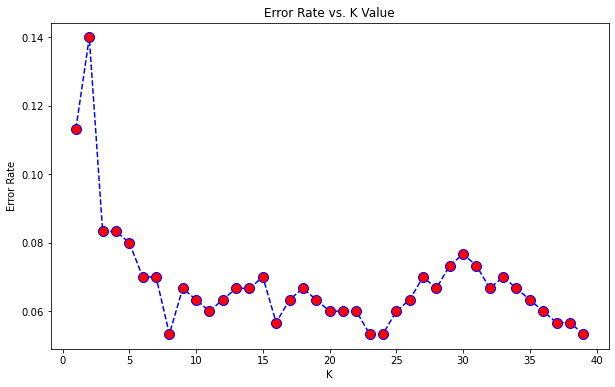

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[131  13]
 [ 21 135]]


              precision    recall  f1-score   support

           0       0.86      0.91      0.89       144
           1       0.91      0.87      0.89       156

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [32]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=37')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=37


[[132  12]
 [  7 149]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       144
           1       0.93      0.96      0.94       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!